In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Load the Zomato dataset using Pandas.




In [91]:
zomato_data = pd.read_csv('C:/Users/hp/Desktop/ML/Deepflow Project/data.csv')

Inspect the dataset and understand its structure.




In [92]:
zomato_data.shape

(41263, 11)

In [93]:
zomato_data.head()

,name,online_order,book_table,Rating,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [94]:
zomato_data.isnull().sum()

name                           0
online_order                   0
book_table                     0
Rating                         0
votes                          0
location                       0
rest_type                      0
cuisines                       0
approx_cost(for two people)    0
listed_in(type)                0
listed_in(city)                0
dtype: int64

In [95]:
zomato_data.duplicated().sum()

73

In [96]:
duplicates = zomato_data[zomato_data.duplicated()]
print(duplicates)

                                  name online_order book_table  Rating  votes  \
1758                        Shiv Sagar           No         No     3.6     10   
3024             The Fisherman's Wharf          Yes        Yes     4.4   4099   
3941                         OPUS Club           No        Yes     4.4   1496   
3942                             Float          Yes        Yes     4.4   3061   
3960                             Float          Yes        Yes     4.4   3061   
...                                ...          ...        ...     ...    ...   
34974  Alchemy - The Chancery Pavilion           No        Yes     4.3    485   
36763    Tipsy Bull - The Bar Exchange           No        Yes     4.6   3173   
36764       BTDT? Been There Done That           No        Yes     4.3    962   
38988                     ShakesBierre           No        Yes     4.4    409   
39373        Sri Ganesh Juice Junction          Yes         No     3.5      6   

                location   

In [97]:
zomato_data = zomato_data.drop_duplicates()

In [98]:
zomato_data.duplicated().sum()

0

In [99]:
print(zomato_data.dtypes)

name                            object
online_order                    object
book_table                      object
Rating                         float64
votes                            int64
location                        object
rest_type                       object
cuisines                        object
approx_cost(for two people)      int64
listed_in(type)                 object
listed_in(city)                 object
dtype: object


Correct inconsistent data formats

In [100]:
zomato_data.columns.tolist()

['name',
 'online_order',
 'book_table',
 'Rating',
 'votes',
 'location',
 'rest_type',
 'cuisines',
 'approx_cost(for two people)',
 'listed_in(type)',
 'listed_in(city)']

In [101]:
zomato_data.head()

,name,online_order,book_table,Rating,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


Standardise key columns like ratings, price, and location.




In [102]:
zomato_data['cuisines'] = (
    zomato_data['cuisines']
    .astype(str)
    .str.lower()
    .str.replace(';', ',', regex=False)
    .str.replace('&', 'and', regex=False)
    .str.replace(r'\s*,\s*', ',', regex=True)
    .str.strip()
)

In [103]:
zomato_data['location'] = zomato_data['location'].astype(str).str.strip().str.title()

In [104]:
zomato_data['online_order'] = zomato_data['online_order'].astype(str).str.strip().str.title()
zomato_data['book_table'] = zomato_data['book_table'].astype(str).str.strip().str.title()

In [105]:
zomato_data['approx_cost(for two people)'] = zomato_data['approx_cost(for two people)'].astype(str).str.replace(',', '')
zomato_data['approx_cost(for two people)'] = pd.to_numeric(zomato_data['approx_cost(for two people)'], errors='coerce')

In [106]:
zomato_data['Rating'] = pd.to_numeric(zomato_data['Rating'], errors='coerce')

In [107]:
zomato_data['votes'] = pd.to_numeric(zomato_data['votes'], errors='coerce').fillna(0).astype(int)

In [108]:
print(zomato_data.dtypes)

name                            object
online_order                    object
book_table                      object
Rating                         float64
votes                            int32
location                        object
rest_type                       object
cuisines                        object
approx_cost(for two people)      int64
listed_in(type)                 object
listed_in(city)                 object
dtype: object


In [109]:
zomato_data.to_csv('cleaned_zomato_data.csv', index=False)

Group data by cuisine and calculate average ratings, votes, and price range.

In [110]:
grouped_cuisine_data = zomato_data.groupby('cuisines')[['Rating', 'votes', 'approx_cost(for two people)']].mean()

In [160]:
grouped_cuisine_data.head()

,Rating,votes,approx_cost(for two people)
cuisines,,,
"african,burger",4.590909,457.818182,1000.000000
"african,burger,desserts,beverages,fast food",4.600000,595.000000,1000.000000
american,3.564286,49.642857,717.857143
"american,asian,continental,north indian,south indian,chinese",4.100000,326.666667,1200.000000
"american,asian,european,north indian",4.300000,3868.750000,1400.000000


Identify top cuisines based on ratings and popularity (votes).




In [161]:
top_cuisines = zomato_data.groupby('cuisines')[['Rating', 'votes','name']].agg({'Rating': 'mean','votes': 'sum','name':'count'
}).sort_values(by=['Rating','votes'], ascending=False)

In [162]:
top_cuisines['restaurant_count'] = zomato_data['cuisines'].value_counts()

In [163]:
top_cuisines.head(10)

,Rating,votes,name,restaurant_count
cuisines,,,,
"continental,north indian,italian,south indian,finger food",4.900000,99531,6,6
"asian,chinese,thai,momos",4.900000,42273,19,19
"healthy food,salad,mediterranean",4.900000,246,1,1
"north indian,european,mediterranean,bbq",4.800000,35637,5,5
"asian,mediterranean,north indian,bbq",4.800000,29956,6,6
"continental,north indian,chinese,european,bbq,finger food,asian",4.800000,4910,10,10
"european,mediterranean,north indian,bbq",4.789474,86418,19,19
"american,tex-mex,burger,bbq,mexican",4.750000,48619,8,8
"north indian,european,mediterranean",4.700000,136485,13,13


In [164]:
top_cuisines_votes = zomato_data.groupby('cuisines')[['Rating', 'votes']].agg({
    'Rating': 'mean',
    'votes': 'sum'
})

In [165]:
top_cuisines_votes['popularity_score'] = top_cuisines_votes['Rating'] * top_cuisines_votes['votes']

In [166]:
top_cuisines_votes.head()

,Rating,votes,popularity_score
cuisines,,,
"african,burger",4.590909,5036,23119.818182
"african,burger,desserts,beverages,fast food",4.600000,1190,5474.000000
american,3.564286,695,2477.178571
"american,asian,continental,north indian,south indian,chinese",4.100000,3920,16072.000000
"american,asian,european,north indian",4.300000,30950,133085.000000


Highlight best-rated restaurants and link them to their cuisine types.

In [167]:
best_restro=zomato_data[['name','cuisines','Rating','votes']].sort_values(by=['Rating','votes'],ascending=[False,False])
best_restro.head(10)

,name,cuisines,Rating,votes
39351,Byg Brewski Brewing Company,"continental,north indian,italian,south indian,...",4.9,16832
39677,Byg Brewski Brewing Company,"continental,north indian,italian,south indian,...",4.9,16832
40027,Byg Brewski Brewing Company,"continental,north indian,italian,south indian,...",4.9,16832
3172,Byg Brewski Brewing Company,"continental,north indian,italian,south indian,...",4.9,16345
3825,Byg Brewski Brewing Company,"continental,north indian,italian,south indian,...",4.9,16345
3936,Byg Brewski Brewing Company,"continental,north indian,italian,south indian,...",4.9,16345
29464,AB's - Absolute Barbecues,"european,mediterranean,north indian,bbq",4.9,6490
16887,AB's - Absolute Barbecues,"european,mediterranean,north indian,bbq",4.9,6452
15341,AB's - Absolute Barbecues,"european,mediterranean,north indian,bbq",4.9,6404
17265,AB's - Absolute Barbecues,"european,mediterranean,north indian,bbq",4.9,6404


Analyse and generate insights into user preferences by cuisine.

#### 1.Premium but Popular Cuisines
#### (High rating & votes, but also expensive)

In [168]:
cuisine_stats = zomato_data.groupby('cuisines').agg({
    'Rating': 'mean',
    'votes': 'sum',
    'approx_cost(for two people)': 'mean'
})

In [169]:
cuisine_stats['preference_score'] = (
    cuisine_stats['Rating'] * cuisine_stats['votes'] / cuisine_stats['approx_cost(for two people)']
)

In [170]:
cuisine_stats.head()

,Rating,votes,approx_cost(for two people),preference_score
cuisines,,,,
"african,burger",4.590909,5036,1000.000000,23.119818
"african,burger,desserts,beverages,fast food",4.600000,1190,1000.000000,5.474000
american,3.564286,695,717.857143,3.450796
"american,asian,continental,north indian,south indian,chinese",4.100000,3920,1200.000000,13.393333
"american,asian,european,north indian",4.300000,30950,1400.000000,95.060714


#### 2.Affordable Favorites
#### (Low cost, high rating, high votes)

In [171]:
affordable_favorites = cuisine_stats[
    (cuisine_stats['approx_cost(for two people)'] < 1000) &
    (cuisine_stats['Rating'] > 4.0) &
    (cuisine_stats['votes'] > 100000)
].sort_values(by='preference_score', ascending=False)

In [172]:
affordable_favorites.head()

,Rating,votes,approx_cost(for two people),preference_score
cuisines,,,,
"pizza,cafe,italian",4.410588,347520,600.0,2554.612706
"cafe,american,burger,steak",4.595349,301059,900.0,1537.190140
"north indian,mughlai,south indian,chinese",4.094643,227930,750.0,1244.389262
"cafe,italian,burger,american,steak",4.172222,102877,650.0,660.347239


#### 3.Most Preferred Cuisine

In [173]:
most_preferred = cuisine_stats.sort_values(by='preference_score', ascending=False)
most_preferred.head()

,Rating,votes,approx_cost(for two people),preference_score
cuisines,,,,
north indian,3.587328,516306,531.205505,3486.708868
"pizza,cafe,italian",4.410588,347520,600.000000,2554.612706
south indian,3.630057,161645,261.023558,2247.998403
"north indian,chinese",3.412109,258225,515.726013,1708.449381
"cafe,american,burger,steak",4.595349,301059,900.000000,1537.190140


Visualise key findings using Matplotlib.




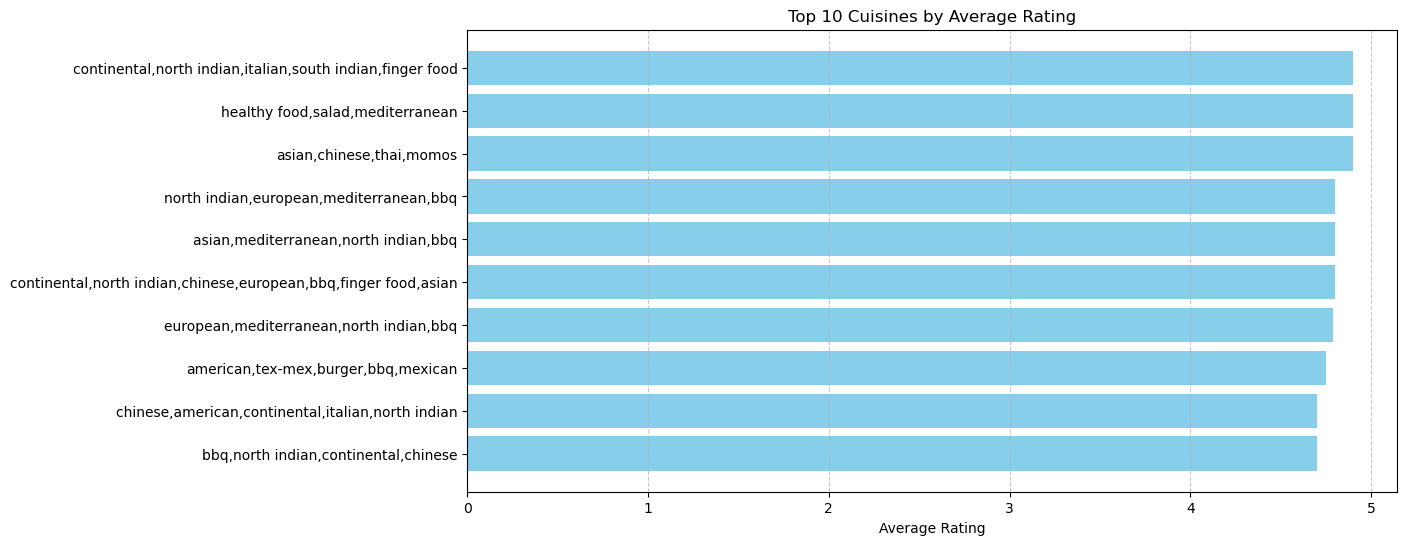

In [174]:
top_10_by_rating = top_cuisines.sort_values(by='Rating', ascending=False).head(10)

plt.figure(figsize=(12,6))
plt.barh(top_10_by_rating.index[::-1], top_10_by_rating['Rating'][::-1], color='skyblue')
plt.xlabel('Average Rating')
plt.title('Top 10 Cuisines by Average Rating')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

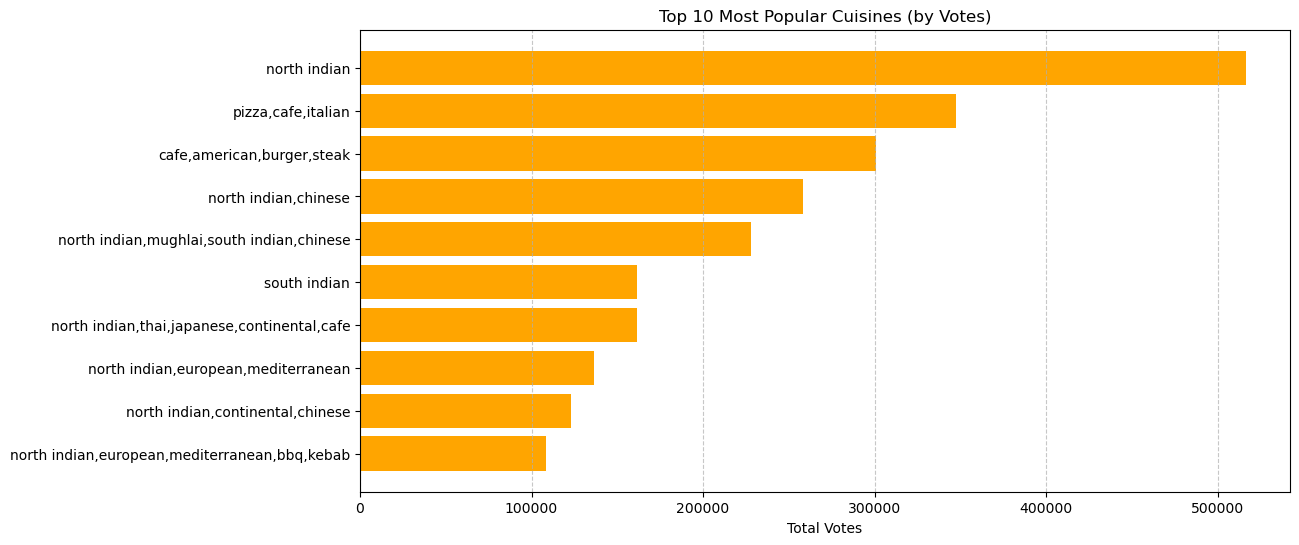

In [175]:
top_10_by_votes = top_cuisines.sort_values(by='votes', ascending=False).head(10)

plt.figure(figsize=(12,6))
plt.barh(top_10_by_votes.index[::-1], top_10_by_votes['votes'][::-1], color='orange')
plt.xlabel('Total Votes')
plt.title('Top 10 Most Popular Cuisines (by Votes)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


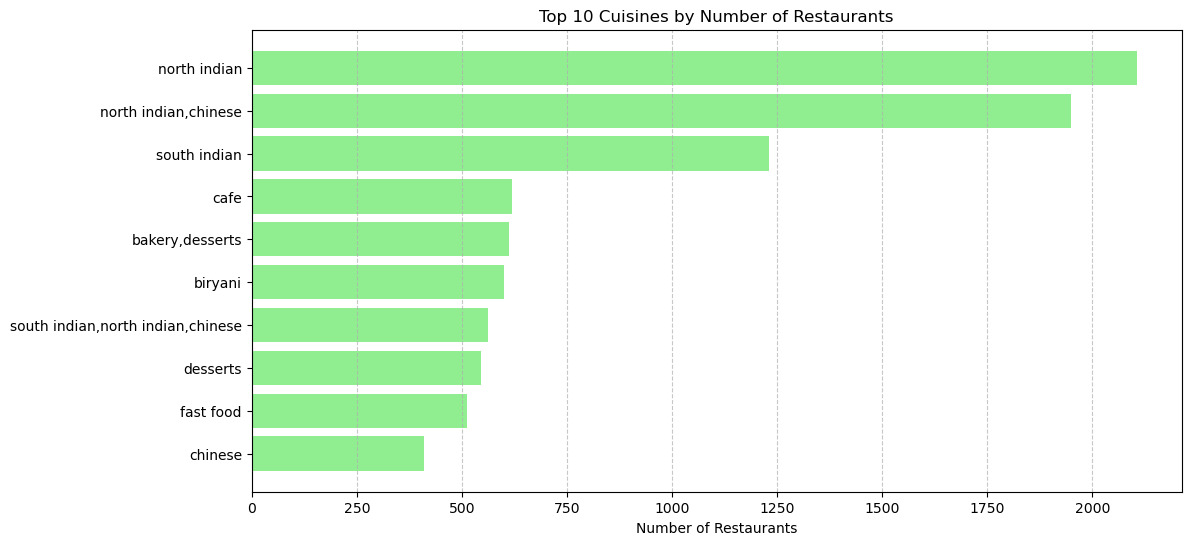

In [176]:
top_10_by_count = top_cuisines.sort_values(by='restaurant_count', ascending=False).head(10)

plt.figure(figsize=(12,6))
plt.barh(top_10_by_count.index[::-1], top_10_by_count['restaurant_count'][::-1], color='lightgreen')
plt.xlabel('Number of Restaurants')
plt.title('Top 10 Cuisines by Number of Restaurants')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


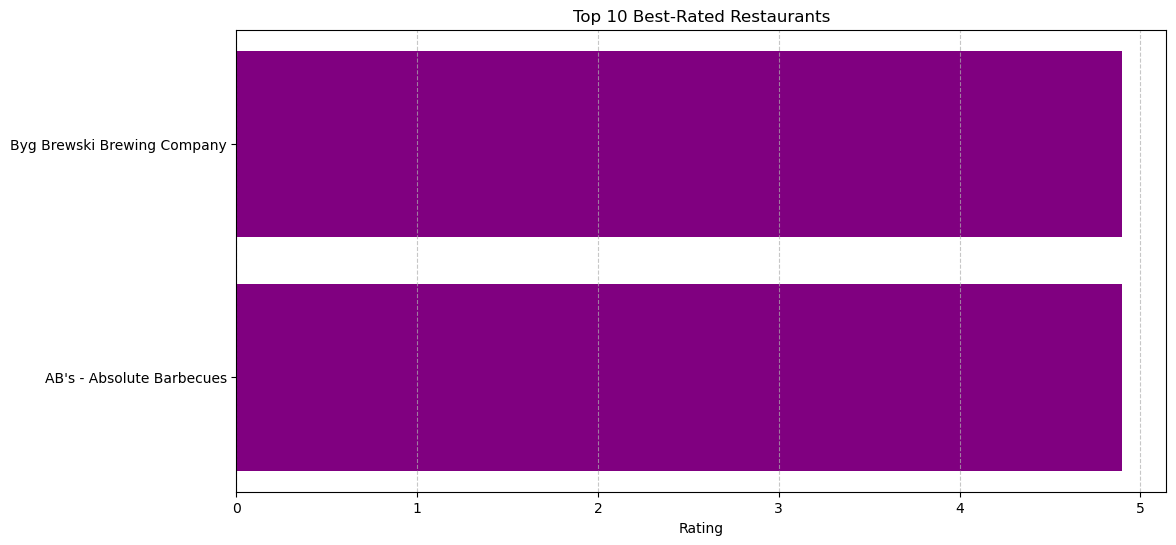

In [177]:
top_10_restro = best_restro.head(10)

plt.figure(figsize=(12,6))
plt.barh(top_10_restro['name'][::-1], top_10_restro['Rating'][::-1], color='purple')
plt.xlabel('Rating')
plt.title('Top 10 Best-Rated Restaurants')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()
